***

## 2️⃣ Multiple Linear Regression

***

**Aim:** Build a model that explain the profits of a start-up by his investment on R&D, Adminsitration,Marketing in three states (CA, FLO and NY).  

***

### 👉🏾 Data Preprocessing

#### ☑️ Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/HP Elitebook/OneDrive/Bureau/HOMEWORKS/ML_BOOTCAMP/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')
df.head(10)

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96

In [4]:
# Verifying if there is missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### ☑️ Creating variables

In [38]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [39]:
x.shape, y.shape

((50, 4), (50,))

In [40]:
# Reshaping the dependant variable
y = y[:,np.newaxis]

In [41]:
y.shape

(50, 1)

#### ☑️ Encoding Categorical Independant Variables

In [44]:
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import OneHotEncoder
transformer = ct( transformers = [('encoders', OneHotEncoder(), [3])], remainder = 'passthrough' )
x = np.array(transformer.fit_transform(x))

#### ☑️ Splitting datasets

In [45]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)

### 👉🏾 Multiple Linear Model 

#### ☑️ Fitting the model

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

#### ☑️ Testing set Prediction

In [49]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)

#### ☑️ Visualization 

In [60]:
con_ =pd.DataFrame(np.concatenate((y_pred, y_test), 1), columns = ['y - Prediction Set', 'y - Testing Set'] )
con_

y - Prediction Set  y - Testing Set
0       126362.879083        134307.35
1        84608.453836         81005.76
2        99677.494252         99937.59
3        46357.460686         64926.08
4       128750.482885        125370.37
5        50912.417419         35673.41
6       109741.350327        105733.54
7       100643.242816        107404.34
8        97599.275746         97427.84
9       113097.425244        122776.86

<AxesSubplot:>

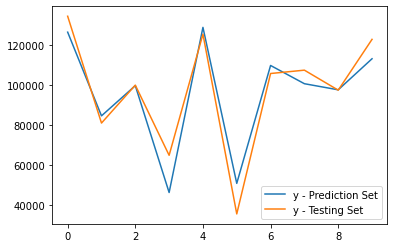

In [61]:
con_.plot()

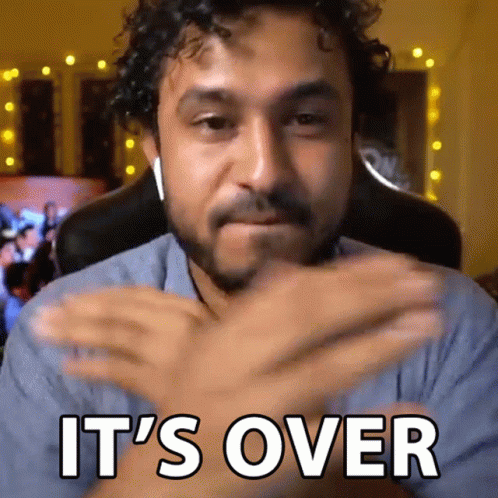